### June 30 2021, Iykra Data Fellowship 6
# Mohammad Niks Iksan

In [1]:
#Import Modules
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score as dbs

In [2]:
#Read data
data = pd.read_csv('..\ML\ML_2_Fellow.csv',encoding='latin1')

# PREPROCESSING

In [3]:
#Check datatype
data.dtypes

Kode_Bayar            object
Kode_Barang           object
Barang                object
Jumlah               float64
Tanggal_Transaksi     object
Harga_Satuan         float64
Kode_Pelanggan       float64
Negara                object
dtype: object

In [4]:
#Check missing values
data.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [5]:
data

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [6]:
data.Kode_Bayar.value_counts()

573585                                                                                     1101
581219                                                                                      742
581492                                                                                      720
580729                                                                                      716
558475                                                                                      689
                                                                                           ... 
552675,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",2,5/10/2011 15:07,10.79,,United Kingdom       1
556222,51014A,"FEATHER PEN,HOT PINK",12,6/9/2011 14:23,0.39,17522,United Kingdom              1
581492,21901,"KEY FOB , BACK DOOR ",2,12/9/2011 10:03,1.63,,United Kingdom                    1
539631,35819B,"ACRYLIC HANGING JEWEL,BLUE",1,12/20/2010 15:03,2.51,,United Kingdom            1
540353,21899,"KEY FOB , GARAGE DESIGN",3

In [7]:
missing = pd.isna(data['Tanggal_Transaksi'])
missing = data[missing]

In [8]:
missing = missing.reset_index(drop=True)

In [9]:
#Check stacked records
missing.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handle Stacked Records

In [10]:
#SPLIT 1
new = missing['Kode_Bayar'].str.split(',', n = 2, expand = True)
new11 = new[[0,1]]
new.head()

,0,1,2
0,536381,82567,"""AIRLINE LOUNGE,METAL SIGN"",2,12/1/2010 9:41,2..."
1,536394,21506,"""FANCY FONT BIRTHDAY CARD, "",24,12/1/2010 10:3..."
2,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE "",48,12/1/2010 1..."
3,536520,22760,"""TRAY, BREAKFAST IN BED"",1,12/1/2010 12:43,12...."
4,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS"",1,12/1/20..."


In [11]:
new2 = new[[2]].T.reset_index(drop=True).T

In [12]:
#SPLIT 2
new2 = new2[0].str.split('",', n = 1, expand = True)
new22 = new2[0]
new2.head()

,0,1
0,"""AIRLINE LOUNGE,METAL SIGN","2,12/1/2010 9:41,2.1,15311,United Kingdom"
1,"""FANCY FONT BIRTHDAY CARD,","24,12/1/2010 10:39,0.42,13408,United Kingdom"
2,"""RECORD FRAME 7"""" SINGLE SIZE","48,12/1/2010 12:27,2.1,16210,United Kingdom"
3,"""TRAY, BREAKFAST IN BED","1,12/1/2010 12:43,12.75,14729,United Kingdom"
4,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS","1,12/1/2010 12:43,2.95,14729,United Kingdom"


In [13]:
new3 = new2[[1]].T.reset_index(drop=True).T

In [14]:
#SPLIT 3
new33 = new3[0].str.split(',', n = 4, expand = True)
new33.head()

,0,1,2,3,4
0,2,12/1/2010 9:41,2.1,15311,United Kingdom
1,24,12/1/2010 10:39,0.42,13408,United Kingdom
2,48,12/1/2010 12:27,2.1,16210,United Kingdom
3,1,12/1/2010 12:43,12.75,14729,United Kingdom
4,1,12/1/2010 12:43,2.95,14729,United Kingdom


In [15]:
new_concat = pd.concat([new11, new22, new33], axis=1).T.reset_index(drop=True).T
new_concat.head()

,0,1,2,3,4,5,6,7
0,536381,82567,"""AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.1,15311,United Kingdom
1,536394,21506,"""FANCY FONT BIRTHDAY CARD,",24,12/1/2010 10:39,0.42,13408,United Kingdom
2,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE",48,12/1/2010 12:27,2.1,16210,United Kingdom
3,536520,22760,"""TRAY, BREAKFAST IN BED",1,12/1/2010 12:43,12.75,14729,United Kingdom
4,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",1,12/1/2010 12:43,2.95,14729,United Kingdom


In [16]:
new_concat.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
7    object
dtype: object

In [17]:
new_concat[[6]].isnull().sum()

6    0
dtype: int64

In [18]:
#Replcae column 6(Kode_Pelanggan, because the are empty string) with NaN
new_concat_v2 = new_concat.replace(r'^\s*$', np.NaN, regex=True)

In [19]:
new_concat_v2[[6]].isnull().sum()

6    2388
dtype: int64

In [20]:
#drop missing values of kode pelanggan
new_concat_v2.dropna(inplace=True)

In [21]:
new_concat_v2.shape

(3647, 8)

In [22]:
#check empty strin in excel
#new_concat_v2.to_excel('new_concat_v2.xlsx')

In [23]:
#change dtypes new_concat_v2
convert = {0: str, 
           1: str,
           2: str,
           3: float,
           4: str,
           5: float,
           6: float,
           7: str}
new_concat_conv = new_concat_v2.astype(convert)

In [24]:
#new_concat_conv is clean and has the right dtypes!
new_concat_conv.dtypes

0     object
1     object
2     object
3    float64
4     object
5    float64
6    float64
7     object
dtype: object

In [25]:
#combine new_concat_conv to data
data.dtypes

Kode_Bayar            object
Kode_Barang           object
Barang                object
Jumlah               float64
Tanggal_Transaksi     object
Harga_Satuan         float64
Kode_Pelanggan       float64
Negara                object
dtype: object

In [26]:
new_concat_conv = new_concat_conv.rename(columns={0: 'Kode_Bayar',
                                                  1: 'Kode_Barang',
                                                  2: 'Barang', 
                                                  3: 'Jumlah',
                                                  4: 'Tanggal_Transaksi',
                                                  5: 'Harga_Satuan',
                                                  6: 'Kode_Pelanggan',
                                                  7: 'Negara'})

In [27]:
new_concat_conv.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536381,82567,"""AIRLINE LOUNGE,METAL SIGN",2.0,12/1/2010 9:41,2.10,15311.0,United Kingdom
1,536394,21506,"""FANCY FONT BIRTHDAY CARD,",24.0,12/1/2010 10:39,0.42,13408.0,United Kingdom
2,536477,22041,"""RECORD FRAME 7"""" SINGLE SIZE",48.0,12/1/2010 12:27,2.10,16210.0,United Kingdom
3,536520,22760,"""TRAY, BREAKFAST IN BED",1.0,12/1/2010 12:43,12.75,14729.0,United Kingdom
4,536520,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",1.0,12/1/2010 12:43,2.95,14729.0,United Kingdom


In [28]:
data_concat = pd.concat([data, new_concat_conv], ignore_index=True)

In [29]:
print(data_concat.shape)
print(data.shape)
print(new_concat_conv.shape)

(545556, 8)
(541909, 8)
(3647, 8)


In [30]:
data_concat.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [31]:
data_new = data_concat.dropna()

In [32]:
data_new.shape

(406829, 8)

In [33]:
data_new.isna().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

In [34]:
data_new.tail()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
545551,581496,21462,"""NURSERY A,B,C PAINTED LETTERS",8.0,12/9/2011 10:20,1.95,16558.0,United Kingdom
545552,581501,22165,"""DIAMANTE HEART SHAPED WALL MIRROR,",12.0,12/9/2011 10:46,3.95,12985.0,United Kingdom
545553,581516,21111,"""SWISS ROLL TOWEL, CHOCOLATE SPOTS",24.0,12/9/2011 11:26,1.25,14422.0,United Kingdom
545554,581538,85071C,"""CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",1.0,12/9/2011 11:34,0.39,14446.0,United Kingdom
545555,581578,21506,"""FANCY FONT BIRTHDAY CARD,",12.0,12/9/2011 12:16,0.42,12713.0,Germany


In [35]:
#Cleaning data from white spaces
data_new['Barang'] = data_new.Barang.str.replace('"','')
data_new['Barang'] = data_new.Barang.str.replace('+',' ')
data_new['Barang'] = data_new.Barang.str.replace(',','')
data_new['Barang'] = data_new.Barang.str.replace('.','')

<ipython-input-35-0f7998016950>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Barang'] = data_new.Barang.str.replace('"','')
<ipython-input-35-0f7998016950>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Barang'] = data_new.Barang.str.replace('+',' ')
<ipython-input-35-0f7998016950>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [36]:
data_new.tail(20)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
545536,581436,21901,KEY FOB BACK DOOR,24.0,12/8/2011 16:18,0.65,17491.0,United Kingdom
545537,581436,21902,KEY FOB FRONT DOOR,24.0,12/8/2011 16:18,0.65,17491.0,United Kingdom
545538,581436,21900,KEY FOB SHED,24.0,12/8/2011 16:18,0.65,17491.0,United Kingdom
545539,581443,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,24.0,12/8/2011 16:58,1.25,13026.0,United Kingdom
545540,581450,21901,KEY FOB BACK DOOR,3.0,12/8/2011 17:54,0.65,16794.0,United Kingdom
545541,581450,21216,SET 3 RETROSPOT TEACOFFEESUGAR,1.0,12/8/2011 17:54,4.95,16794.0,United Kingdom
545542,C581466,21216,SET 3 RETROSPOT TEACOFFEESUGAR,-1.0,12/8/2011 19:20,4.95,13883.0,United Kingdom
545543,581467,90214C,LETTER C BLING KEY RING,1.0,12/8/2011 19:24,0.29,13077.0,United Kingdom
545544,581469,85071C,CHARLIE LOLAEXTREMELY BUSY SIGN,1.0,12/8/2011 19:28,0.39,14606.0,United Kingdom
545545,581469,51014C,FEATHER PENCOAL BLACK,12.0,12/8/2011 19:28,0.39,14606.0,United Kingdom


## Dealing with negative values

In [37]:
#There are canceled 'Barang' with negative values but i don't know to handle it, so i will subset with include 'Jumlah' &'Harga_Satuan' > 0
data_new.reset_index(drop=True, inplace=True)
data1 = data_new[data_new.Jumlah > 0]
data2 = data1[data1.Harga_Satuan > 0]
data2.reset_index(drop=True)
#Delete white space
data2.Barang = data2.Barang.str.strip()

C:\Users\niksi.DESKTOP-9H9OB0U\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
#Create new column sales
data2['Sales'] = data2['Jumlah']*data2['Harga_Satuan']

<ipython-input-38-94ad7b6500ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Sales'] = data2['Jumlah']*data2['Harga_Satuan']


In [39]:
#Data is ready to analyst
data2.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [40]:
df = data2

# 1. What items customers buy the most and are there any items we should ignore?

In [41]:
#df1 = df

In [42]:
#df1.to_excel('df1.xlsx')

In [43]:
df1_most = df.groupby('Barang').sum().sort_values(by=['Jumlah'], ascending = False)

In [44]:
df1_most

,Jumlah,Harga_Satuan,Kode_Pelanggan,Sales
Barang,,,,
PAPER CRAFT LITTLE BIRDIE,80995.0,2.08,16446.0,168469.60
MEDIUM CERAMIC TOP STORAGE JAR,77916.0,241.62,3047321.0,81416.73
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415.0,138.40,7226036.0,13586.25
JUMBO BAG RED RETROSPOT,46181.0,3261.69,24748363.0,85220.78
WHITE HANGING HEART T-LIGHT HOLDER,36725.0,5867.22,31562068.0,100448.15
...,...,...,...,...
FUNKY MONKEY MUG,1.0,1.25,14606.0,1.25
BLACKCHRISTMAS TREE 30CM,1.0,1.25,15048.0,1.25
FRYING PAN RED POLKADOT,1.0,4.25,14156.0,4.25


In [45]:
df1_fewest = df1_most.loc[df1_most['Jumlah'] == 1 ].reset_index()

In [46]:
df1_fewest.Barang.unique()

array(['AMBER BERTIE GLASS BEAD BAG CHARM',
       'SILVER AND BLACK ORBIT NECKLACE', 'BLUE PADDED SOFT MOBILE',
       'VINTAGE BEAD PINK JEWEL STAND', 'PINK CRYSTAL GUITAR PHONE CHARM',
       'MUMMY MOUSE RED GINGHAM RIBBON', 'CROCHET LILAC/RED BEAR KEYRING',
       'JADE CRYSTAL GLASS BRACELET', 'CAPIZ CHANDELIER',
       'TEA TIME BREAKFAST BASKET', 'LASER CUT MULTI STRAND NECKLACE',
       'CHERRY BLOSSOM PURSE', 'CAKE STAND LACE WHITE',
       'JARDIN ETCHED GLASS BUTTER DISH', 'I LOVE LONDON MINI RUCKSACK',
       'PACK 4 FLOWER/BUTTERFLY PATCHES',
       'BLUE/NAT SHELL NECKLACE W PENDANT',
       'BLUE LEAVES AND BEADS PHONE CHARM',
       'BLUE/GREEN SHELL NECKLACE W PENDANT',
       'CRACKED GLAZE EARRINGS BROWN', 'CRACKED GLAZE EARRINGS RED',
       'CROCHET DOG KEYRING', 'BLUE NEW BAROQUE FLOCK CANDLESTICK',
       'PINK POLKADOT KIDS BAG', 'SET/6 IVORY BIRD T-LIGHT CANDLES',
       'BLACK FINE BEAD NECKLACE W TASSEL',
       'PURPLE CHUNKY GLASS BEAD NECKLACE',
       'W

# 2. What is our strategy to increase sales based on our export destination countries?

In [47]:
df2 = df.groupby('Negara').sum().sort_values(by=['Jumlah'], ascending = False)

In [48]:
df2 = df2.sort_values(by=['Jumlah'])

In [49]:
clrs2= []
for i in df2['Jumlah']:
    if i == min(df2['Jumlah']):
        clrs2.append('red')
    elif i ==max(df2['Jumlah']):
        clrs2.append('blue')
    else:
        clrs2.append('grey')

<IPython.core.display.Javascript object>


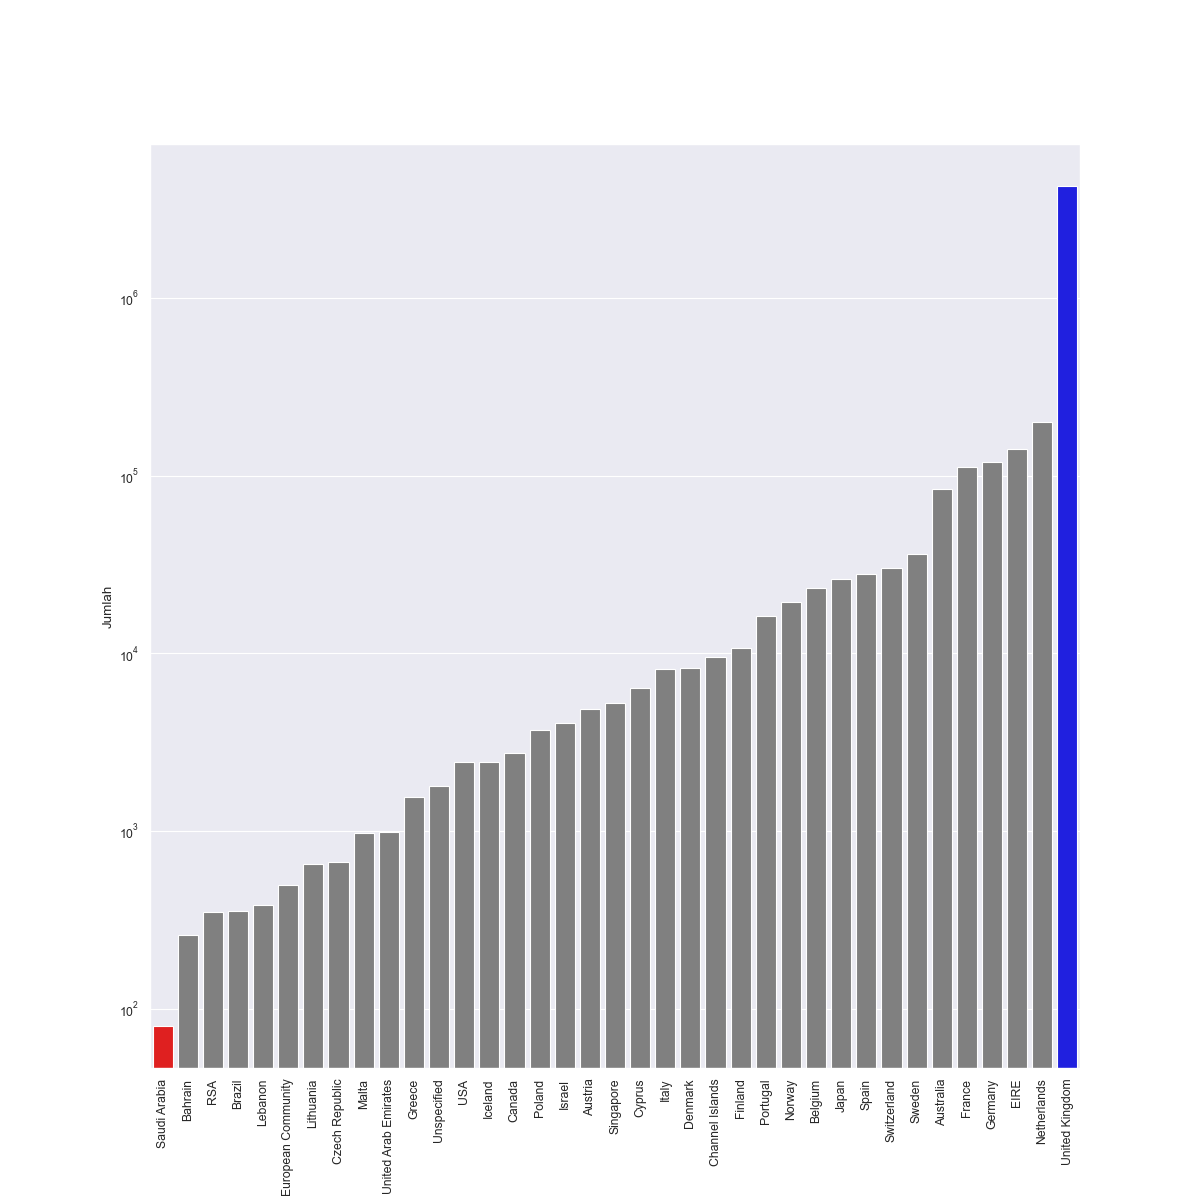

In [50]:
#Generate barplot
sns.set(rc={'figure.figsize':(15,15)})
bar2 = sns.barplot(x=df2.index, y='Jumlah', data=df2, palette= clrs2)
bar2.set_yscale("log")
for i in bar2.get_xticklabels():
    i.set_rotation(90)

In [50]:
print(df2['Jumlah'])

Negara
Saudi Arabia                 80.0
Bahrain                     260.0
RSA                         351.0
Brazil                      356.0
Lebanon                     386.0
European Community          499.0
Lithuania                   652.0
Czech Republic              671.0
Malta                       970.0
United Arab Emirates        982.0
Greece                     1557.0
Unspecified                1789.0
USA                        2458.0
Iceland                    2458.0
Canada                     2763.0
Poland                     3684.0
Israel                     4046.0
Austria                    4881.0
Singapore                  5241.0
Cyprus                     6361.0
Italy                      8112.0
Denmark                    8235.0
Channel Islands            9491.0
Finland                   10704.0
Portugal                  16122.0
Norway                    19336.0
Belgium                   23237.0
Japan                     26016.0
Spain                     27940.0
Switzer

# 3. Do customer segmentation appropriately. Please explain in detail and completely

In [51]:
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [52]:
df['Tanggal_Transaksi'] = df['Tanggal_Transaksi'].astype('datetime64[ns]')

<ipython-input-52-56c7bdb9d1e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal_Transaksi'] = df['Tanggal_Transaksi'].astype('datetime64[ns]')


# BY PELANGGAN

In [53]:
#Revenue and jumlah barang
df_aggc = df.groupby('Kode_Pelanggan').agg({'Sales':sum})

In [54]:
df_aggc = df_aggc.reset_index()

In [55]:
#Recency
pelanggan = pd.DataFrame(df['Kode_Pelanggan'].unique())
pelanggan.columns = ['Kode_Pelanggan']

In [56]:
recency = df.groupby('Kode_Pelanggan').Tanggal_Transaksi.max().reset_index()
recency.columns = ['Kode_Pelanggan','LastPurchaseDate']

In [57]:
LastInvoiceDate = recency['LastPurchaseDate'].max()

In [58]:
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days

In [59]:
pelanggan = pd.merge(pelanggan, recency[['Kode_Pelanggan','Recency']], on ='Kode_Pelanggan')

In [60]:
pelanggan.head()

,Kode_Pelanggan,Recency
0,17850.0,371
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,333


In [61]:
#Frequency
frequency = df.groupby('Kode_Pelanggan').Tanggal_Transaksi.count().reset_index()
frequency.columns = ['Kode_Pelanggan','Frequency']

pelanggan = pd.merge(pelanggan, frequency, on='Kode_Pelanggan')

In [62]:
pelanggan2 = pelanggan.sort_values('Kode_Pelanggan').reset_index(drop=True)

In [63]:
pelanggan2.head()

,Kode_Pelanggan,Recency,Frequency
0,12346.0,325,1
1,12347.0,1,182
2,12348.0,74,31
3,12349.0,18,73
4,12350.0,309,17


In [64]:
df_aggc.head()

,Kode_Pelanggan,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [65]:
#merge
pelanggan = pd.merge(pelanggan2, df_aggc, on='Kode_Pelanggan')

In [66]:
pelanggan.head()

,Kode_Pelanggan,Recency,Frequency,Sales
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [67]:
pelanggan.corr()

,Kode_Pelanggan,Recency,Frequency,Sales
Kode_Pelanggan,1.000000,0.007631,-0.001394,-0.013691
Recency,0.007631,1.000000,-0.206125,-0.122097
Frequency,-0.001394,-0.206125,1.000000,0.422129
Sales,-0.013691,-0.122097,0.422129,1.000000


# CLUSTERING

In [68]:
pelanggan_temp = pelanggan.copy()
pelanggan = pelanggan.drop(['Kode_Pelanggan'],axis=1)
pelanggan.head()

,Recency,Frequency,Sales
0,325,1,77183.60
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [69]:
#Normalize data first using minmaxscaler
scaler = MinMaxScaler()
pelanggan[pelanggan.columns] = scaler.fit_transform(pelanggan[pelanggan.columns])

In [70]:
pelanggan.corr()

,Recency,Frequency,Sales
Recency,1.000000,-0.206125,-0.122097
Frequency,-0.206125,1.000000,0.422129
Sales,-0.122097,0.422129,1.000000


In [71]:
pelanggan[['Recency']] = pelanggan[['Recency']].apply(lambda x: 1-x)

In [72]:
pelanggan.corr()

,Recency,Frequency,Sales
Recency,1.000000,0.206125,0.122097
Frequency,0.206125,1.000000,0.422129
Sales,0.122097,0.422129,1.000000


## KMEANS PELANGGAN

In [73]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(pelanggan)

KMeans(n_clusters=3, random_state=0)

In [74]:
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [1 2 2 ... 2 2 2]


In [75]:
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[0.59141892 0.00507331 0.00283053]
 [0.21332088 0.00289173 0.00215361]
 [0.91645094 0.01523038 0.00967511]]


In [76]:
pelanggan['clusters'] = cluster_labels

In [77]:
pelanggan.head()

,Recency,Frequency,Sales,clusters
0,0.128686,0.000000,0.275443,1
1,0.997319,0.023069,0.015368,2
2,0.801609,0.003824,0.006401,2
3,0.951743,0.009177,0.006259,2
4,0.171582,0.002039,0.001180,1


<IPython.core.display.Javascript object>


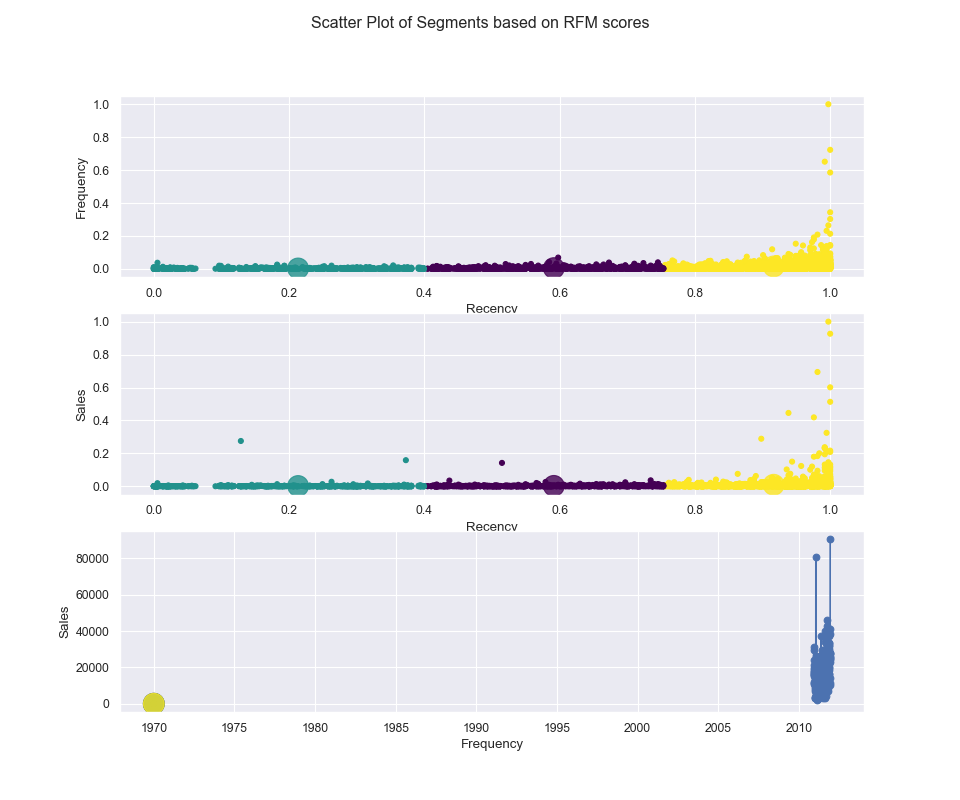

In [79]:
# Scatter plot of data coloured by cluster they belong to
fig, (ax4, ax5, ax6) = plt.subplots(3);
fig.suptitle('Scatter Plot of Segments based on RFM scores');

pelanggan.plot.scatter(x = 'Recency', y = 'Frequency', c=pelanggan['clusters'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,3), 
            cmap='viridis');

pelanggan.plot.scatter(x = 'Recency', y = 'Sales', c=pelanggan['clusters'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,3), 
            cmap='viridis');

pelanggan.plot.scatter(x = 'Frequency', y = 'Sales', c=pelanggan['clusters'], colormap='viridis', ax=ax6, colorbar=False);
ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,3), 
            cmap='viridis');

In [78]:
from sklearn import metrics
metrics.silhouette_score(pelanggan, cluster_labels, metric='euclidean')

0.9124572889085367

## Customer Dataframe

In [79]:
pelanggan['Kode_Pelanggan'] = cluster_labels
pelanggan.Kode_Pelanggan.unique()

array([1, 2, 0])

In [80]:
pelanggan['Profile'] = cluster_labels
pelanggan['Profile'].replace({0: "Low Value", 1: "Mid Value", 2: "High Value"}, inplace = True)

In [81]:
pelanggan.head()

,Recency,Frequency,Sales,clusters,Kode_Pelanggan,Profile
0,0.128686,0.000000,0.275443,1,1,Mid Value
1,0.997319,0.023069,0.015368,2,2,High Value
2,0.801609,0.003824,0.006401,2,2,High Value
3,0.951743,0.009177,0.006259,2,2,High Value
4,0.171582,0.002039,0.001180,1,1,Mid Value


In [82]:
pelanggan.Profile.describe(include=['O'])

count           4338
unique             3
top       High Value
freq            2906
Name: Profile, dtype: object

In [83]:
pelanggan.tail()

,Recency,Frequency,Sales,clusters,Kode_Pelanggan,Profile
4333,0.257373,0.001147,0.000631,1,1,Mid Value
4334,0.517426,0.000765,0.000275,0,0,Low Value
4335,0.981233,0.001402,0.000622,2,2,High Value
4336,0.991957,0.096227,0.007463,2,2,High Value
4337,0.887399,0.008794,0.006544,2,2,High Value


<IPython.core.display.Javascript object>


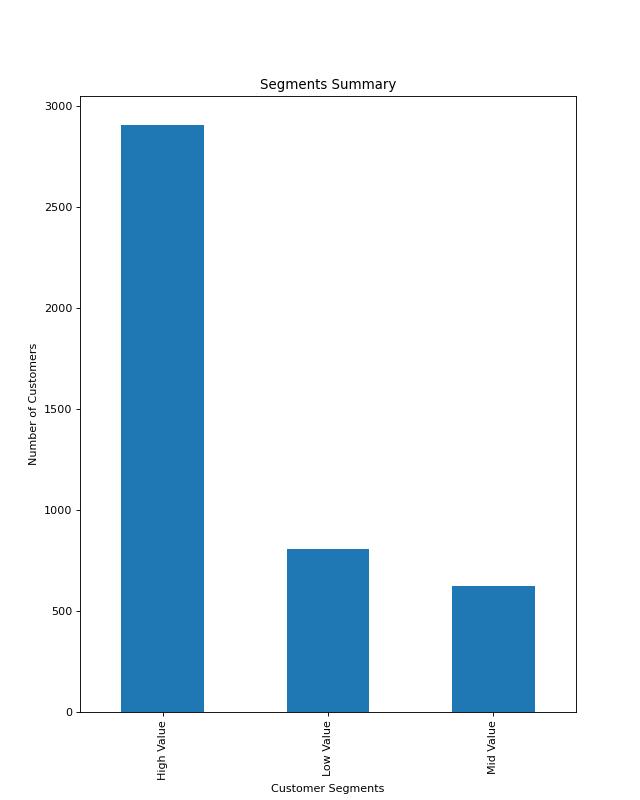

Text(0.5, 1.0, 'Segments Summary')

In [83]:
pelanggan.groupby('Profile').Profile.count().plot.bar(figsize=(8,10))
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Segments Summary")

# 4. Get the hidden insight from the data

In [84]:
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [85]:
df.dtypes

Kode_Bayar                   object
Kode_Barang                  object
Barang                       object
Jumlah                      float64
Tanggal_Transaksi    datetime64[ns]
Harga_Satuan                float64
Kode_Pelanggan              float64
Negara                       object
Sales                       float64
dtype: object

In [86]:
df['Tanggal_Transaksi'] = df['Tanggal_Transaksi'].dt.date

<ipython-input-86-ef9acaa22822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal_Transaksi'] = df['Tanggal_Transaksi'].dt.date


In [87]:
df['Tanggal_Transaksi'] = df['Tanggal_Transaksi'].astype('datetime64')

<ipython-input-87-e05fcad33752>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal_Transaksi'] = df['Tanggal_Transaksi'].astype('datetime64')


In [88]:
df.dtypes

Kode_Bayar                   object
Kode_Barang                  object
Barang                       object
Jumlah                      float64
Tanggal_Transaksi    datetime64[ns]
Harga_Satuan                float64
Kode_Pelanggan              float64
Negara                       object
Sales                       float64
dtype: object

In [89]:
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6.0,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [90]:
df = df.groupby('Tanggal_Transaksi').agg({'Jumlah':sum})

In [91]:
df = df.reset_index()

<IPython.core.display.Javascript object>


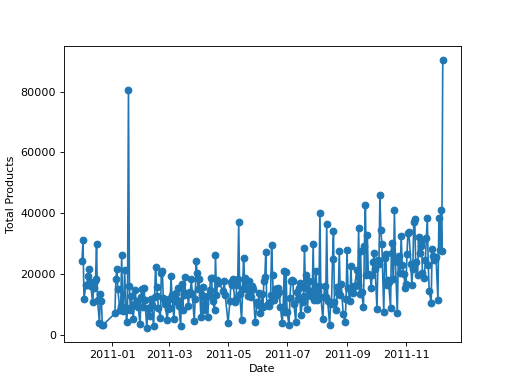

Text(0, 0.5, 'Total Products')

In [97]:
#Create time series plot
price_date = df['Tanggal_Transaksi']
price_close = df['Jumlah']
plt.plot_date(price_date, price_close, linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Total Products')